In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/home/TE/Downloads/Iris.csv')

In [48]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)    
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_filtered
cdf = remove_outliers(df)

/tmp/ipykernel_4205/2249107698.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_filtered = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]


In [64]:
def identify_feature_types(df):
    numeric_features = df.select_dtypes(include=['number']).columns.tolist()
    nominal_features = df.select_dtypes(exclude=['number']).columns.tolist()
    
    print(f"numeric_features: {numeric_features},\nnominal_features:{nominal_features}")

identify_feature_types(df)

numeric_features: ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
nominal_features:['Species']


In [49]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [50]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [51]:
cdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

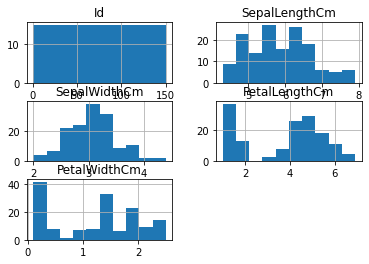

In [52]:
df.hist()

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

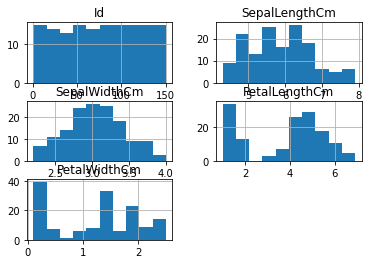

In [53]:
cdf.hist()

In [54]:
# after
cdf.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,76.582192,5.856849,3.036986,3.807534,1.219863
std,43.453305,0.834093,0.395145,1.757117,0.760365
min,1.000000,4.300000,2.200000,1.000000,0.100000
25%,40.250000,5.100000,2.800000,1.600000,0.300000
50%,77.500000,5.800000,3.000000,4.400000,1.300000
75%,113.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.000000,6.900000,2.500000


In [55]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [56]:
cdf.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

<AxesSubplot:>

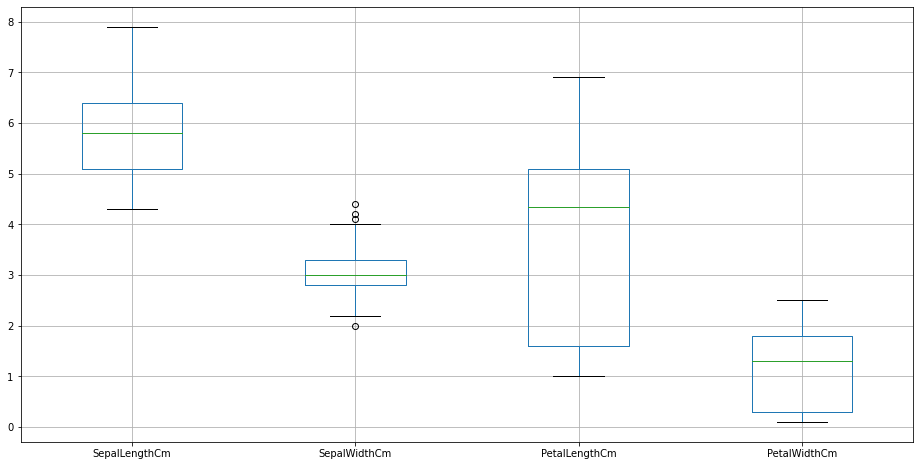

In [67]:
df = df.drop('Id', axis='columns')
df.boxplot(figsize=(16,8))

<AxesSubplot:>

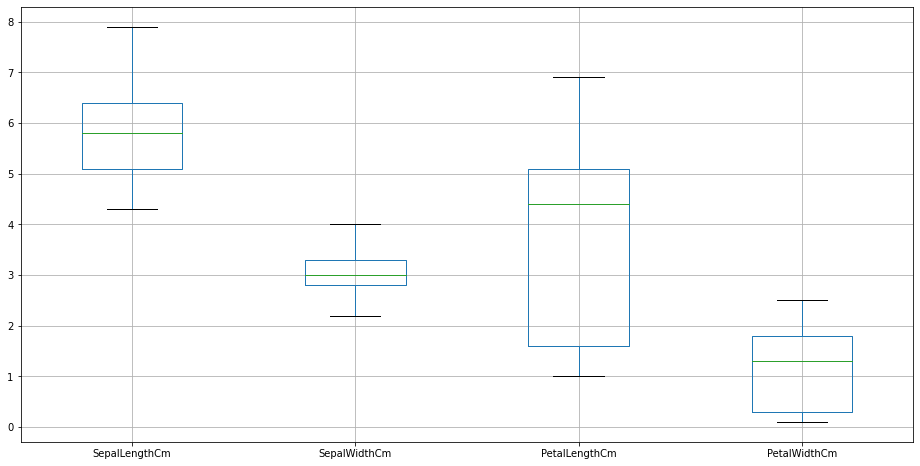

In [68]:
cdf = cdf.drop('Id', axis='columns')
cdf.boxplot(figsize=(16,8))

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

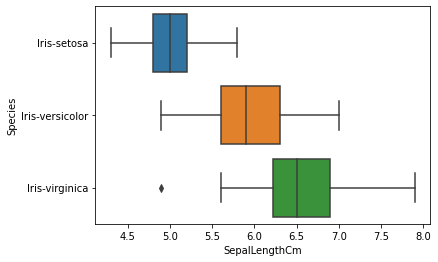

In [60]:
sns.boxplot(data=df, y='Species', x ='SepalLengthCm')

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Species'>

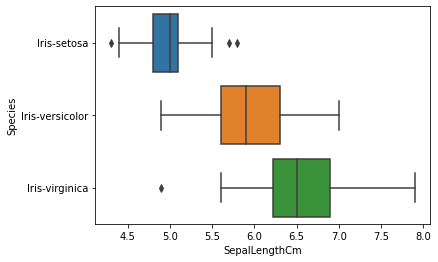

In [62]:
sns.boxplot(data=cdf, y='Species', x ='SepalLengthCm')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Species'>

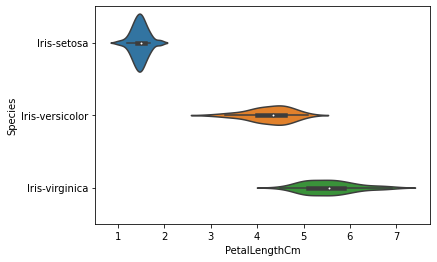

In [61]:
sns.violinplot(x='PetalLengthCm', data=df, y='Species')